In [131]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# 线性回归
### loadDataSet
* 输入：文件名
* 输出：数据的特征矩阵xArr,真实输出矩阵yArr
* 收集准备数据

In [144]:
def loadDataSet(fileName):

    numFeat = len(open(fileName).readline().split('\t')) - 1           # 特征的数目
    xArr = []                                                          
    yArr = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split()                                # 读取一行数据，并以空白分割
        for i in range(numFeat):                          
            lineArr.append(float(curLine[i]))
        xArr.append(lineArr)                                           # 结果为嵌套列表
        yArr.append(float(curLine[-1]))                               # 取最后一列
                                                            
    return xArr, yArr

### standRegres
* 输入：训练的数据，包括样本特征数据和标签
* 输出：参数
* 计算线性回归的参数

In [145]:
def standRegres(xArr, yArr):

    xMat = np.mat(xArr)                                         # 200*2矩阵
    yMat = np.mat(yArr).T                                      # 200 *1

    xTx = xMat.T * xMat                                       # 根据推导的矩阵式计算回归系数
    if np.linalg.det(xTx) == 0.0:
        print("矩阵为奇异矩阵,不能求逆")
        return
    ws = xTx.I * (xMat.T * yMat)
    return ws

### plotRegression
* 输入：无
* 输出：无
* 绘制回归曲线和数据点

In [146]:
def plotRegression():
    xArr, yArr = loadDataSet('ex0.txt')                      # 加载数据集
    ws = standRegres(xArr, yArr)                            # 计算回归系数
    print(ws)
    xMat = np.mat(xArr)                                    # 创建xMat矩阵
    yMat = np.mat(yArr)                                    # 创建yMat矩阵
    xCopy = xMat.copy()                                   # 深拷贝xMat矩阵
    yHat = xCopy * ws                                    # 计算对应的y_hat值
    fig = plt.figure()
    ax = fig.add_subplot(111)                            # 添加subplot
    ax.plot(xCopy[:, 1], yHat, c='red')                  # 绘制回归曲线
    ax.scatter(xMat[:, 1].flatten().A[0], yMat.flatten().A[0], s=20, c='blue', alpha=.5)  # 绘制样本点
    plt.title('DataSet')                                  # 绘制title
    plt.xlabel('X')
    plt.show()

[[3.00774324]
 [1.69532264]]


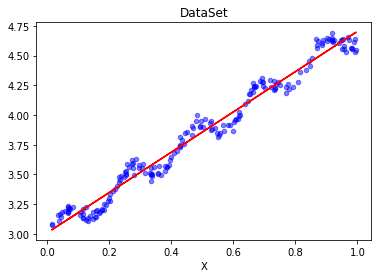

In [147]:
plotRegression()

# logistic回归
### loadDataSet
* 输入：文件名
* 输出：数据的特征矩阵dataMat,真实输出矩阵labelMat
* 收集准备数据

In [148]:
def loadDataSet(filename):   #读取数据（这里只有两个特征）
    dataMat = []
    labelMat = []
    fr = open(filename)
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])   #前面的1，表示方程的常量。比如两个特征X1,X2，共需要三个参数，W1+W2*X1+W3*X2
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

### sigmoid
* 输入：向量
* 输出：向量
* 非线性转换

In [149]:
def sigmoid(inX):  #sigmoid函数
    return 1.0/(1+np.exp(-inX))

### gradAscent
* 输入训练数据
* 输出参数
* 采用梯度下降法求最优参数

In [150]:
def gradAscent(dataMat, labelMat): #求最优参数
    dataMatrix= np.mat(dataMat) #将读取的数据转换为矩阵
    classLabels= np.mat(labelMat).transpose() #将读取的数据转换为矩阵
    m,n = dataMatrix.shape
    alpha = 0.001  #设置学习率
    maxCycles = 500 #设置迭代的次数，一般看实际数据进行设定，有些可能200次就够了
    weights = np.ones((n,1)) #设置初始的参数，并都赋默认值为1。注意这里权重以矩阵形式表示三个参数。
    for k in range(maxCycles):
        h = sigmoid(dataMatrix*weights)
        error = (classLabels - h)     #求导后差值
        weights = weights + alpha * dataMatrix.transpose()* error #迭代更新权重
    return weights

### plotBestFit
* 输入：无
* 输出： 无
* 绘制逻辑回归的分类图

In [151]:
def plotBestFit():  #画出最终分类的图
    dataMat,labelMat=loadDataSet('data.txt')
    weights = gradAscent(dataMat, labelMat).getA()
    print(weights)
    dataArr = np.mat(dataMat)
    n = dataArr.shape[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


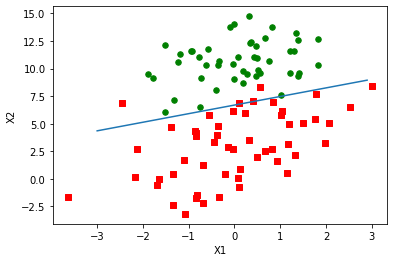

In [152]:
plotBestFit()